# Вызов библиотек. Чтение файла.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
data = pd.read_csv('forFBpost.csv',sep=';')
data.head()

Город  year  fact   Модель  Нижняя граница  Верхняя граница
0  Белокуриха  2000   NaN  15400.0         15100.0          15700.0
1  Белокуриха  2001   NaN  15400.0         15100.0          15700.0
2  Белокуриха  2002   NaN  15400.0         15000.0          15700.0
3  Белокуриха  2003   NaN  15300.0         15000.0          15700.0
4  Белокуриха  2004   NaN  15300.0         14900.0          15600.0

# Описание данных в датасете

In [2]:
round(data.describe(),2)
#данные выглядят логично, без аномалий

year         fact       Модель  Нижняя граница  Верхняя граница
count  30250.00      3250.00     30250.00        30250.00         30250.00
mean    2060.00    127138.17    140216.82       138798.12        141730.43
std       34.93    767593.06    886619.25       881804.44        891467.78
min     2000.00      2370.00         0.00            0.00           400.00
25%     2030.00     15831.00     11700.00        11400.00         12000.00
50%     2060.00     33875.00     27900.00        27400.00         28400.00
75%     2090.00     72760.00     74100.00        72900.00         75600.00
max     2120.00  12678079.00  15419400.00     15304200.00      15535500.00

In [3]:
print(data['year'].value_counts())
print(data.sort_values('fact',ascending = False)['Город'].unique())
print(data.sort_values('fact',ascending = False)['Город'].nunique())
#print(data.sort_values('Город',ascending = False)['Город'].value_counts().head())
#print(data.query("Город == ['Кировск','Краснослободск'] & year == 2020").head())
data.loc[4235:4355,'Город'] = 'Краснослободск (Волгоградская)'
data.loc[15125:15245,'Город'] = 'Кировск (Ленинградская)'
data.loc[16940:17060,'Город'] = 'Кировск (Мурманская)'
data.loc[27830:27950,'Город'] = 'Краснослободск (Мордовия)'
print(data.sort_values('Город',ascending = False)['Город'].value_counts().head())

2000    250
2061    250
2089    250
2088    250
2087    250
       ... 
2036    250
2035    250
2034    250
2033    250
2120    250
Name: year, Length: 121, dtype: int64
['Москва' ' Уфа' 'Краснодар' 'Тольятти' 'Ульяновск' 'Ярославль' 'Томск'
 'Оренбург' 'Набережные Челны' 'Пенза' 'Чебоксары' 'Магнитогорск'
 'Иваново' 'Архангельск' 'Саранск' 'Якутск' 'Таганрог' 'Химки' 'Дзержинск'
 'Ангарск' 'Великий Новгород' 'Анапа' 'Коломна' 'Петропавловск-Камчатский'
 'Сызрань' 'Каменск-Уральский' 'Новочеркасск' 'Волгодонск' 'Миасс'
 'Электросталь' 'Керчь' 'Нефтекамск' 'Ялта' 'Черкесск' 'Новочебоксарск'
 'Каспийск' 'Евпатория' 'Назрань' 'Камышин' 'Невинномысск' 'Кызыл'
 'Октябрьский' 'Новокуйбышевск' 'Воркута' 'Ессентуки' 'Новошахтинск'
 'Новотроицк' 'Соликамск' 'Елец' 'Реутов' 'Ленинск-Кузнецкий' 'Арзамас'
 'Егорьевск' 'Тобольск' 'Сарапул' 'Железногорск' 'Глазов' 'Усть-Илимск'
 'Каменск-Шахтинский' 'Бузулук' 'Михайловка' 'Березовский' 'Лысьва'
 'Всеволожск' 'Новоалтайск' 'Клинцы' 'Полевской' 'Белог

### В датасете данные по численности населения с 2000 по 2120 год в 250 городах России, уникальных названий городов 248. Кировск и Краснослободск встречаются дважды. Кранослободск с фактом 18571 в 2020 году индекс 4255 - город в Волгоградской области, с фактом 9229 в Мордовии индекс 27850. Кировск индекс 16960 Мурманская область, индекс 15145 Ленинградская область Названия этих городов были уточнены.

In [4]:
data_without_missigs = data[data['fact'].notna()]
data_without_missigs['year'].value_counts()

2008    250
2009    250
2010    250
2011    250
2012    250
2013    250
2014    250
2015    250
2016    250
2017    250
2018    250
2019    250
2020    250
Name: year, dtype: int64

С 2008 по 2020 год по 250 городам есть фактические значения численности населения

                         Город            std          mean         V  \
211                    Сысерть    3130.813051  6.508678e+04  0.048102   
214                   Тобольск    1998.185127  1.004025e+05  0.019902   
111                  Краснодар  332106.619799  1.347678e+06  0.246429   
242                     Югорск   14801.434392  5.397686e+04  0.274218   
121                      Кызыл   40336.244476  1.648347e+05  0.244707   
..                         ...            ...           ...       ...   
230                      Химки   34093.292927  2.559934e+05  0.133180   
7                      Алатырь    4641.910526  3.459091e+04  0.134195   
8    Александровск-Сахалинский    2159.068580  1.190248e+04  0.181397   
57                  Десногорск    2464.244586  2.688430e+04  0.091661   
71                   Завитинск    1137.135495  1.089752e+04  0.104348   

       p-value JB  
211  8.439026e-04  
214  5.243654e-04  
111  2.479216e-04  
242  1.078997e-04  
121  5.916653e-05  
.. 

(array([87., 65., 38., 26., 15.,  9.,  4.,  2.,  3.,  1.]),
 array([0.01752879, 0.16572096, 0.31391312, 0.46210528, 0.61029744,
        0.75848961, 0.90668177, 1.05487393, 1.20306609, 1.35125826,
        1.49945042]),
 <BarContainer object of 10 artists>)

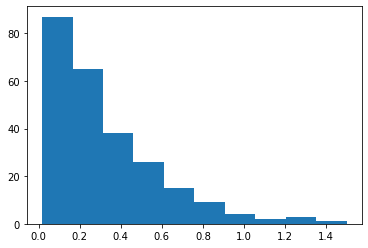

In [5]:
V_data = data.pivot_table('Модель','Город',aggfunc = ['std','mean'])
V_data['V'] = V_data['std']/V_data['mean']
V_data = V_data.reset_index()
V_data.columns = ['Город','std','mean','V']
p_value_JB_list = []

for i in range(len(V_data['Город'])):
    n = shapiro(data[data['Город']==V_data['Город'][i]]['Модель'])
    p_value_JB_list.append(n.pvalue)
    
p_value_JB = pd.DataFrame(p_value_JB_list, columns = ['p-value JB'])
V_data = pd.concat([V_data,p_value_JB], axis = 1)
print(V_data.sort_values('p-value JB',ascending = False))
plt.hist(V_data['V'])


### По гистограмме с коэф. вариации видно, что в большинстве городов распределение средней численности населения в динамике однородно. Значение p_value из теста shapiro позволяет отвергнуть гипотезу H0 о нормальности распределения средней численности населения в динамике для всех городов и сделать вывод о том, что распредление ненормально. 

# Анализ данных

### Построим график с суммарной численностью насления по верхней и нижней границе модельных данных по годам.

Text(0.5, 1.0, 'Динамика суммарной численности населения')

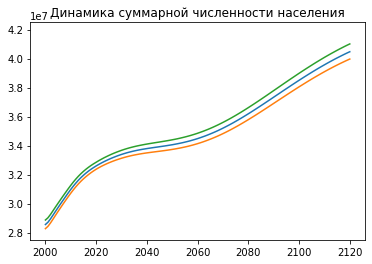

In [6]:
model_population = data.groupby('year').agg({'Модель':'sum','Нижняя граница':'sum','Верхняя граница':'sum'})
plt.plot(model_population)
plt.ylim([27500000,42500000])
plt.title('Динамика суммарной численности населения')

### По графику видно, что население в прогнозе растет неравномерно. С 2020 года темпы роста значительно снижаются, но с 2060 вновь увеличиваются.

                2000       2120  growth       mean_pop
Город                                                 
Гудермес     44700.0  2425000.0  0.0336  602803.305785
Магас         5300.0   117200.0  0.0259   49000.000000
Назрань     119200.0  1104700.0  0.0186  464060.330579
Анапа       114400.0   734900.0  0.0155  425183.471074
Каспийск    103800.0   639500.0  0.0151  316632.231405
...              ...        ...     ...            ...
Саяногорск   20000.0      500.0 -0.0300   15847.107438
Наволоки      4600.0      100.0 -0.0311    3514.876033
Карачаевск   19200.0      400.0 -0.0315   12784.297521
Пучеж         8900.0      100.0 -0.0364    2548.760331
Плес           700.0        0.0 -1.0000     689.256198

[250 rows x 4 columns]


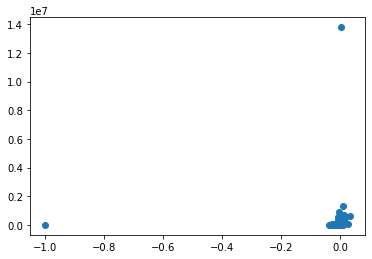

In [7]:
mean_pop_city = data.groupby('Город').agg({'Модель':'mean'})
mean_pop_city.columns = ['mean_pop']
city_population = data.query('year == [2000,2120]')
city_population_pivot = city_population.pivot_table('Модель','Город','year',aggfunc = 'sum')
city_population_pivot.columns = ['2000','2120']
city_population_pivot['growth'] = round((city_population_pivot['2120']/city_population_pivot['2000'])**(1/121),4) - 1
city_population_growth = city_population_pivot.merge(mean_pop_city,on = 'Город',how = 'left')
print(city_population_growth.sort_values('growth',ascending = False))
plt.scatter(city_population_growth['growth'],city_population_growth['mean_pop'])

### При построении точечной диаграммы заметили 2 выброса, это г. Плес, где население прогнозируется 0 человек в 2120 году и г.Москва, где средняя численность населения в 10 раз больше, чем у второго по численности города. Для дальнейшей оценки предлагаем исключить эти города.

30314.87603305785
0.38506005727773834


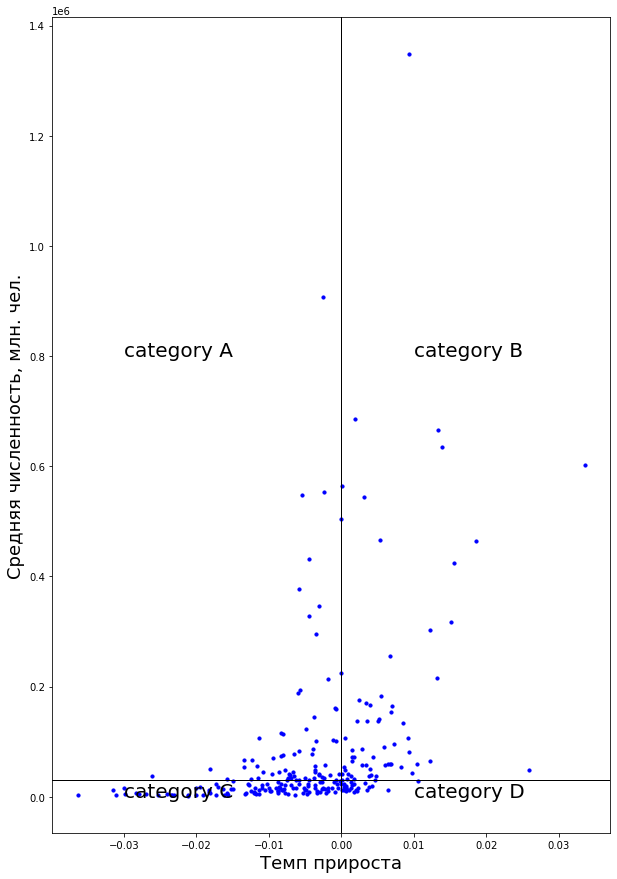

In [8]:
new_data = city_population_growth.query("Город != ['Москва','Плес']")
print(new_data['mean_pop'].median())
print(new_data['mean_pop'].corr(new_data['growth']))

ax = new_data.plot('growth','mean_pop', kind = 'scatter', figsize = (10,15), s =10, c = 'blue')
ax.axhline(y = new_data['mean_pop'].median(),color='black', linestyle='-', lw=1)
ax.axvline(x = 0,color='black', linestyle='-', lw=1)
ax.text(0.01,800000,'category B', c = 'black', size = 20)
ax.text(0.01,0,'category D', c = 'black', size = 20)
ax.text(-0.03,800000,'category A', c = 'black',size = 20)
ax.text(-0.03,0,'category C', c = 'black',size = 20)
plt.xlabel('Темп прироста',size =18)
plt.ylabel('Средняя численность, млн. чел.', size =18)


categoryA = new_data.query("growth < 0 & mean_pop > mean_pop.median()").reset_index()['Город']
categoryB = new_data.query("growth > 0 & mean_pop > mean_pop.median()").reset_index()['Город']
categoryC = new_data.query("growth < 0 & mean_pop < mean_pop.median()").reset_index()['Город']
categoryD = new_data.query("growth > 0 & mean_pop < mean_pop.median()").reset_index()['Город']

### По графику видно, что для крупных городов с средней численностью более 400 тыс. человек, есть тенденция к увеличению численности населения. В это же время большинство городов с численностью до 100 тыс. человек, оказались в левой части графика, то есть темп прироста населения в них отрицательный.  Коэффициент корреляции 0,39 указывает на умеренную прямую зависимость между темпом прироста населения и средней численностью населения. 

# Выводы и гипотезы для дальнейших исследований

### В целях дальнейшего анализа города были разделены на 4 категории A,B,C,D в зависимости от сопоставления срднего значения численности населения в этих городах с медианным средним по выборке и темпом прироста насления (положительный или отрицательный)

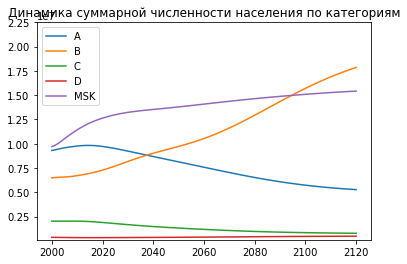

In [9]:
dataA = data.query("Город in @categoryA")
dataB = data.query("Город in @categoryB")
dataC = data.query("Город in @categoryC")
dataD = data.query("Город in @categoryD")
dataMoscow = data.query("Город == 'Москва'")

dataA_pop = dataA.groupby('year').agg({'Модель':'sum'})
plt.plot(dataA_pop, label ="A")

dataB_pop = dataB.groupby('year').agg({'Модель':'sum'})
plt.plot(dataB_pop, label ="B")

dataC_pop = dataC.groupby('year').agg({'Модель':'sum'})
plt.plot(dataC_pop, label ="C")

dataD_pop = dataD.groupby('year').agg({'Модель':'sum'})
plt.plot(dataD_pop, label ="D")

dataMoscow_pop = dataMoscow.groupby('year').agg({'Модель':'sum'})
plt.plot(dataMoscow_pop, label ="MSK")

plt.ylim([100000,22500000])
plt.title('Динамика суммарной численности населения по категориям')
plt.legend()

### MSK растет логарифмически на протяжении всего периода. Гипотеза: MSK - затухающий миграционный прирост при естественной убыли.

### B растет экспоненциально на протяжении всего периода. Гипотеза: в B - естественный рост (коэф. рождаемости > 2).

### A стремительно падает с 2015. Гипотеза: в А - естественная убыль (коэф. рождаемости < 2).

### C стабильно снижается на протяжении всего периода. Гипотеза: в С - естественная убыль (коэф. рождаемости < 2)

### D стабильно растет с низкими темпами на протяжении всего периода. Гипотеза: в D - города "спутники" Москвы, растут вместе с Москвой.